In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from vega import VegaLite
import numpy as np
from poitousprint import Portic
portic_client = Portic()
pd.options.mode.chained_assignment = None

In [2]:
#pointcalls = portic_client.get_pointcalls(year=1789, source_subset="Poitou_1789")

In [3]:
#len(pointcalls)

In [4]:
sorties = pd.read_csv("sorties_navires_vers_etranger.csv")

In [5]:
sorties_mixtes = pd.read_csv("sorties_navires_vers_etranger_mixte_DFLR_ailleurs1787.csv")
sorties = sorties_mixtes[sorties_mixtes.region_depart == "Aunis-Saintonge-Poitou"]

In [6]:
sorties["homeport_state_1789_fr"] = sorties.homeport_state_1789_fr.str.replace("Duché de Mecklenbourg", "Mecklenbourg")

In [7]:
flag_to_homestate = {"britannique": "Grande-Bretagne",
                    "français": "France",
                     "danois": "Danemark",
                     "hollandais": "Provinces-Unies",
                     "étasunien": "Etats-Unis d'Amérique",
                     "prussien": "Prusse",
                     "lubeckois": "Lubeck",
                     "polonais": "Pologne",
                     "hambourgeois": "Hambourg",
                     "brémois": "Brême",
                     "meckelmbourgeois": "Mecklenbourg",
                     "oldenbourgeois": "Duché d'Oldenbourg",
                     "papenbourgeois": "Prusse"
                    }

In [8]:
sorties["flag"] = sorties.ship_flag_standardized_fr.map(flag_to_homestate)

In [9]:
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna(sorties.flag)
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna("Non renseigné")

In [10]:
sorties["destination"] = sorties["substate_destination"].fillna(sorties["state_destination"])

In [11]:
sorties["outside_DFLR"] = (
    (sorties["homeport_state_1789_fr"] != "France") | 
    (~sorties["homeport_province"].isin(["Aunis", "Poitou", "Saintonge"])))

In [12]:
sorties["Port d'attache"] = sorties["outside_DFLR"].map({True: "autres", False: "Aunis, Poitou, Saintonge"})

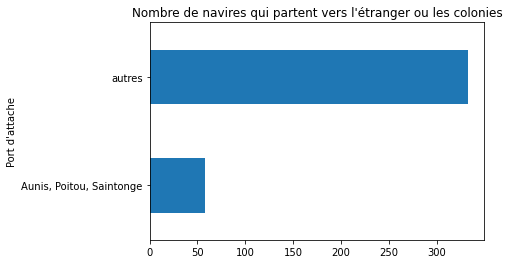

In [13]:
(sorties.groupby("Port d'attache").size()).plot.barh()
plt.title("Nombre de navires qui partent vers l'étranger ou les colonies")
plt.show()

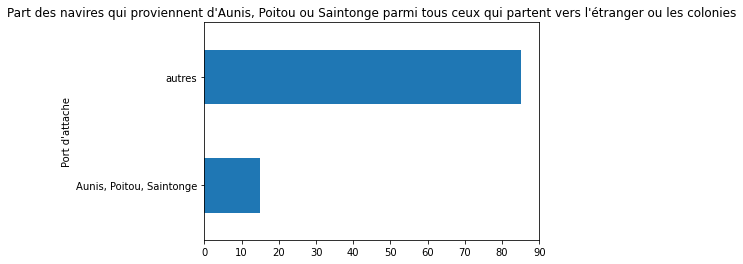

In [14]:
(sorties.groupby("Port d'attache").size()*100/len(sorties)).plot.barh()
plt.xticks(np.arange(0, 100, 10))
plt.title("Part des navires qui proviennent d'Aunis, Poitou ou Saintonge parmi tous ceux qui partent vers l'étranger ou les colonies")
plt.show()

In [15]:
sorties["commodity_standardized_fr"] = sorties["commodity_standardized_fr"].fillna("")

In [16]:
noDFLR = sorties[(sorties.outside_DFLR == True)]

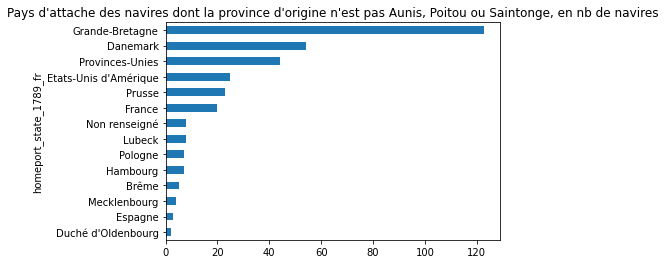

In [17]:
nb_pointcalls = noDFLR.groupby("homeport_state_1789_fr").size()
nb_pointcalls.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

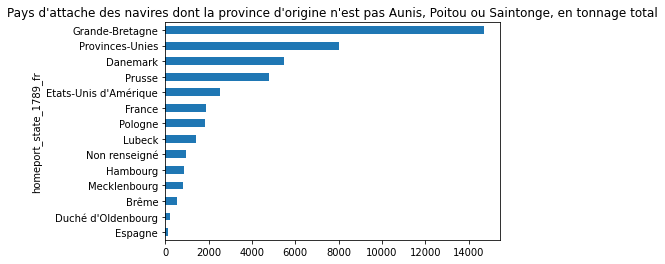

In [18]:
tonnage = noDFLR.groupby("homeport_state_1789_fr")["tonnage"].sum()
tonnage.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

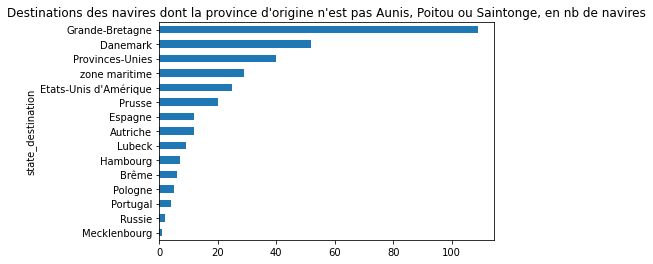

In [19]:
destination = noDFLR.groupby("state_destination").size()
destination.sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

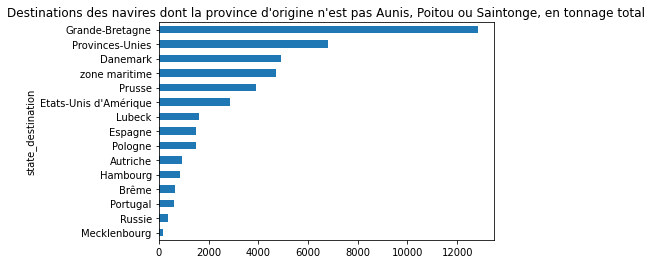

In [20]:
noDFLR.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

## Focus sur les navires français hors de la région

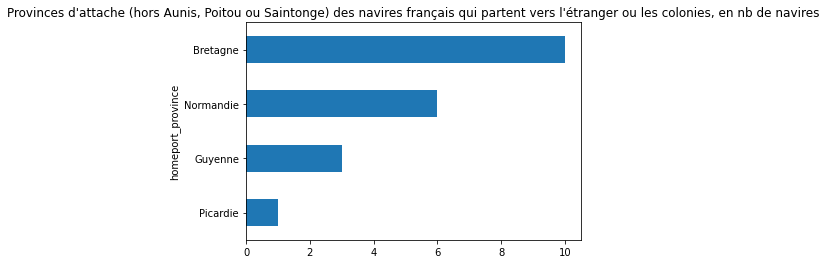

In [21]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province").size()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en nb de navires")
plt.show()

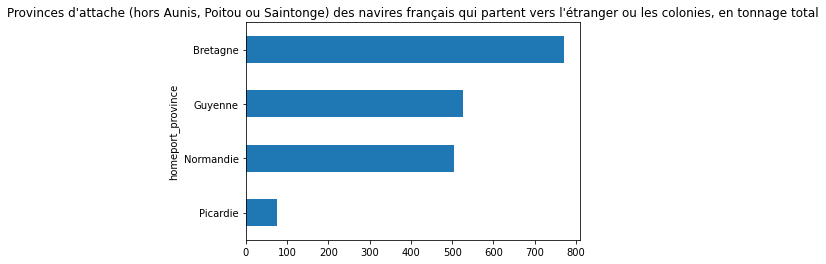

In [22]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].sum()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage total")
plt.show()

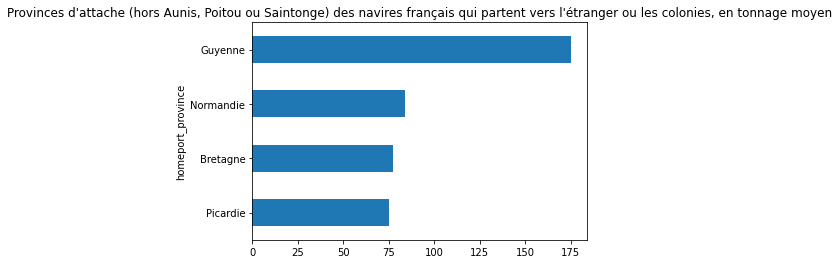

In [23]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].mean().sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage moyen")
plt.show()

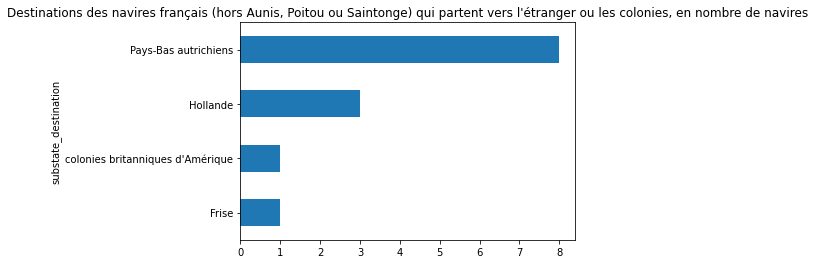

In [24]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("substate_destination").size().sort_values().plot.barh()
plt.title("Destinations des navires français (hors Aunis, Poitou ou Saintonge) qui partent vers l'étranger ou les colonies, en nombre de navires")
plt.show()

In [25]:
"""
from IPython.core.display import SVG
SVG(filename=‘path_to_fichier.svg')
"""

"\nfrom IPython.core.display import SVG\nSVG(filename=‘path_to_fichier.svg')\n"

## Focus sur la Grande-Bretagne

In [26]:
gb = sorties[sorties.state_destination == "Grande-Bretagne"]

In [27]:
gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna(gb["homeport_province"])
gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna("Grande-Bretagne, province absente")

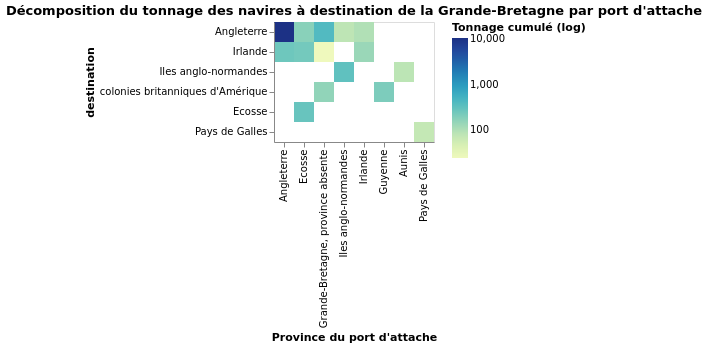

In [28]:
VegaLite({
    "title": "Décomposition du tonnage des navires à destination de la Grande-Bretagne par port d'attache",
    "mark": "rect",
    "encoding": {
        "y": {
            "type": "nominal", 
            "field": "destination",
            "title": "destination",
            "sort": "-color"
        },
        "x": {
            "field": "homeport_substate_1789_fr",
            "type": "nominal",
            "title": "Province du port d'attache",
            "sort": "-color"
        },
        "color": {
            "type": "quantitative",
            "aggregate": "sum",
            "field": "tonnage",
            "title": "Tonnage cumulé (log)",
            "scale": {
                "type": "log"
            }
        }
    }
}, gb)

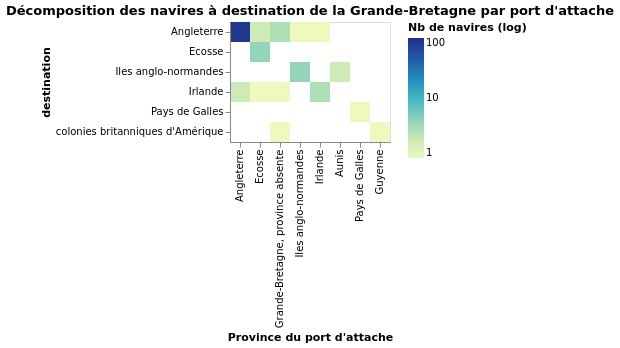

In [29]:
VegaLite({
    "title": "Décomposition des navires à destination de la Grande-Bretagne par port d'attache",
    "mark": "rect",
    "encoding": {
        "y": {
            "type": "nominal", 
            "field": "destination",
            "title": "destination"
        },
        "x": {
            "field": "homeport_substate_1789_fr",
            "type": "nominal",
            "title": "Province du port d'attache",
            "sort": "-color"
        },
        "color": {
            "type": "quantitative",
            "aggregate": "count",
            "title": "Nb de navires (log)",
            "scale": {
                "type": "log",
                "domain": [1,100]
            }
        }
    }
}, gb)